In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

cacao = pd.read_csv('cacao_flavors.csv.xls')

In [14]:
display(cacao.head(5))
cacao.info()

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [15]:
cacao.columns = ['bar_id', 'company', 'specific_origin',
               'ref', 'review_date', 'cocoa_percent',
               'company_location', 'rating', 'bean_type',
               'broad_origin']

In [16]:
cacao.head(3)

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo


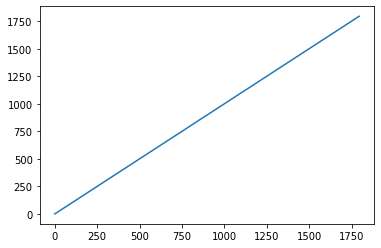

In [17]:
cacao.bar_id.nunique()
plt.plot(cacao.bar_id)

In [18]:
cacao.drop(['bar_id'], inplace=True, axis=1)

In [19]:
cacao.company.value_counts()

                      99
Soma                  45
Bonnat                26
Fresco                26
Pralus                25
                      ..
Solkiki                1
Shattell               1
Sibu Sura              1
Loiza                  1
Rancho San Jacinto     1
Name: company, Length: 408, dtype: int64

In [20]:
cacao.company = cacao.company.apply(lambda x: 
                                        None if x.strip()=='' else x)

In [21]:
display(pd.DataFrame(cacao.company.value_counts()))
print((cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()
cacao

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
...,...
Solkiki,1
Shattell,1
Sibu Sura,1
Loiza,1


30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [22]:
len(cacao.specific_origin.unique())

1013

In [23]:
cacao.specific_origin = cacao.specific_origin.apply(lambda x: 
                                        None if x.strip()=='' else x)
display(pd.DataFrame(cacao.specific_origin.value_counts()))
print((cacao.specific_origin.value_counts()>10).sum())
cacao.loc[:, ['specific_origin']].info()

,specific_origin
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
Venezuela,21
...,...
"Somia Plantation, Akesson, 2012",1
"Island Growers, 120hr c.",1
Capistrano,1
"Kongo, Highlands",1


15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   specific_origin  1737 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

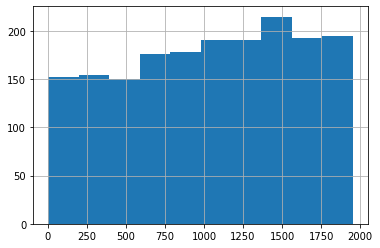

In [24]:
cacao.ref.hist()
cacao.ref.describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

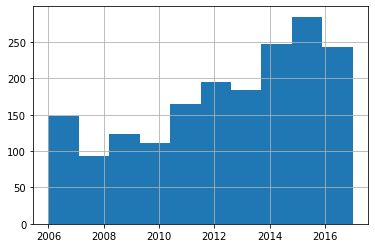

In [25]:
cacao.review_date.hist()
cacao.review_date.describe()

In [26]:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

In [27]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x:
                                               float(x.replace('%','')))

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

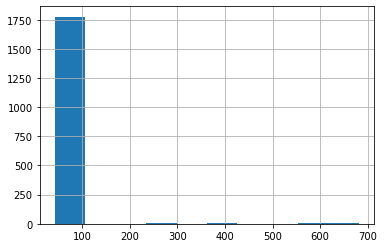

In [30]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

## Формула интерквартильного расстояния: 

## percentile(25) -1.5*IQR : percentile(75)+1.5*IQR

In [38]:
mdeian = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
prec25 = cacao.cocoa_percent.quantile(0.25)
prec75 = cacao.cocoa_percent.quantile(0.75)
print('25 перцентиль: {}'.format(prec25),
      '75 перцентиль: {}'.format(prec75), 
      'IQR: {}'.format(IQR), 
      'Границы выбросов: [{f}, {l}].'.format(
          f=prec25-1.5*IQR, l=prec75+1.5*IQR))

25 перцентиль: 70.0 75 перцентиль: 75.0 IQR: 5.0 Границы выбросов: [62.5, 82.5].
